### From the book "Python Machine Learning for Beginners" by AI Publishing

#### 9.2 Recurrent Neural Networks (RNN)

9.2.1 What Is an RNN and LSTM?

What Is an RNN?

In [31]:
# A recurrent neural network is a type of neural network that is used to process data that 
# is sequential in nature, e.g., stock price data, text sentences, or sales of items.
# Sequential data is a type of data where the value of data at time step T depends upon the values 
# of data at timesteps less than T. For instance, sound waves, text sentences, stock market prices, etc. 
# In the stock market price prediction problem, the value of the opening price of a stock 
# at a given data depends upon the opening stock price of the previous days.

# In a recurrent neural network, at each time step, the previous output of the neuron is also 
# multiplied by the current input via a weight vector. 

Problems with RNN

In [32]:
# A problem with the recurrent neural network is that while it can capture a shorter sequence, 
# it tends to forget longer sequences.

# To solve this problem, a special type of recurrent neural network, i.e., Long Short-Term Memory (LSTM) 
# has been developed.

What Is an LSTM?

In [33]:
# LSTM is a type of RNN which is capable of remembering longer sequences,and hence, 
# it is one of the most commonly used RNN for sequence tasks.
# In LSTM, instead of a single unit in the recurrent cell, there are four interacting units, 
# i.e., a forget gate, an input gate, an update gate, and an output gate.

9.3 Predicting Future Stock Prices via LSTM in Keras

9.3.1 Training the Stock Prediction Model

In [34]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [35]:
# Importing libraries
import pandas as pd
import numpy as np

# Importing dataset
url = "https://raw.githubusercontent.com/duochen/Python-MachineLearning/master/Reference/PythonMachineLearningforBeginners/Data/fb_train.csv"
fb_complete_data = pd.read_csv(url)

In [36]:
# Print dataset header
fb_complete_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [37]:
# We are only interested in the Open column. Therefore, we will select the Open column from the dataset.
# Filtering Open column
fb_training_processed = fb_complete_data[['Open']].values

In [38]:
# Scaling features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
fb_training_scaled = scaler.fit_transform(fb_training_processed)

In [39]:
# Check the total length of teh dataset
len(fb_training_scaled)

1257

In [40]:
# Before we proceed further, we need to divide our data into features and labels. Our feature set 
# will consist of 60 timesteps of 1 feature. The feature set basically consists of the opening stock 
# price of the past 60 days, while the label set will consist of the opening stock price of 61st day. 
# Based on the opening stock prices of the previous days, we will be predicted the opening stock price
# for the next day.
# Training features contain data of last 60 days
# Training labels contain data of 61st day
fb_training_features = []
fb_training_labels = []
for i in range(60, len(fb_training_scaled)):
    fb_training_features.append(fb_training_scaled[i-60:i, 0])
    fb_training_labels.append(fb_training_scaled[i, 0])

In [41]:
# We need to convert our data into Numpy array before we can use as input with Keras.
X_train = np.array(fb_training_features)
y_train = np.array(fb_training_labels)

In [42]:
# Print the shape of our dataset
print(X_train.shape)
print(y_train.shape)

(1197, 60)
(1197,)


In [43]:
# We need to reshape our input features into 3-dimensional format.
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [44]:
# Creates our LSTM model. We have 4 LSTM layers with 100 nodes each. Each LSTM layer is followed 
# by a dropout layer to avoid overfitting. The final dense has one node since the output is 
# a single value.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, Flatten, LSTM
from tensorflow.keras.models import Model

In [45]:
# Defining the LSTM network
input_layer = Input(shape = (X_train.shape[1], 1))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
do1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(100, activation='relu', return_sequences=True)(do1)
do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation='relu', return_sequences=True)(do2)
do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation='relu')(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

In [46]:
# Next, we need to convert the output y into a column vector.
print(X_train.shape)
print(y_train.shape)
y_train = y_train.reshape(-1, 1)
print(y_train.shape)

(1197, 60, 1)
(1197,)
(1197, 1)


In [47]:
# Trains our stock price prediction model on the training set.
model_history = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size=32)

Epoch 1/100
38/38 [==============================] - 9s 141ms/step - loss: 0.0639
Epoch 2/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0079
Epoch 3/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0067
Epoch 4/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0068
Epoch 5/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0061
Epoch 6/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0064
Epoch 7/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 6s 148ms/step - loss: 0.0055
Epoch 10/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0056
Epoch 11/100
38/38 [==============================] - 6s 150ms/step - loss: 0.0051
Epoch 12/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0045
Epoch 13/100


In [48]:
# Our model has been trained. Next, we will test our stock prediction model on the test data.

9.3.2 Testing the Stock Prediction Model

In [50]:
# The test data should also be converted into the right shape to test our stock prediction model. 
# We will do that later. Let’s first import the data and then remove all the columns from the test data
# except the Open column.
url = "https://raw.githubusercontent.com/duochen/Python-MachineLearning/master/Reference/PythonMachineLearningforBeginners/Data/fb_test.csv"
fb_testing_complete_data = pd.read_csv(url)
fb_testing_processed = fb_testing_complete_data[['Open']].values

In [51]:
# Let’s concatenate the training and test sets. We do this to predict the first value in the test set.
# The input will be the data from the past 60 days, which is basically the data from the last 60 days 
# in the training set.
fb_all_data = pd.concat((fb_complete_data['Open'], fb_testing_complete_data['Open']), axis=0)

In [52]:
# Create our final input feature set
test_inputs = fb_all_data[len(fb_all_data) - len(fb_testing_complete_data) - 60:].values
print(test_inputs.shape)

(80,)


In [53]:
# We need to scale our data and convert it into a column vector.
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

(80, 1)


In [54]:
# As we did with the training data, we need to divide our input data intofeatures and labels.
fb_test_features = []
for i in range(60, 80):
    fb_test_features.append(test_inputs[i-60:i, 0])

In [55]:
# Print our feature set
X_test = np.array(fb_test_features)
print(X_test.shape)

(20, 60)


In [56]:
# Our feature set is currently 2-dimensional. But the LSTM algorithm in Keras accepts only data 
# in 3-dimensional. The following script converts our input features into a 3-dimensional shape.
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(20, 60, 1)


In [57]:
# Making predications on test data
y_pred = model.predict(X_test)

In [58]:
# Since we scaled our input feature, we need to apply the inverse_transform() method of the 
# scaler object on the predicted output to get the original output values.
y_pred = scaler.inverse_transform(y_pred)

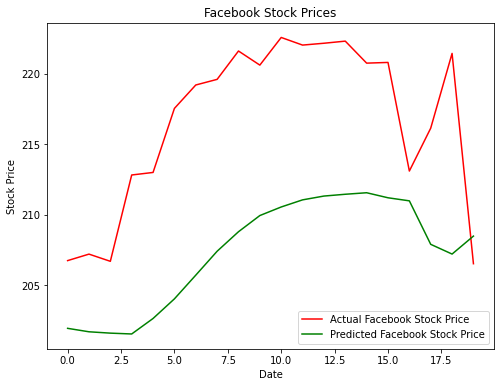

In [60]:
# Finally, to compare the predicted output with the actual stock price values
plt.figure(figsize=(8,6))
plt.plot(fb_testing_processed, color='red', label='Actual Facebook Stock Price')
plt.plot(y_pred, color='green', label='Predicted Facebook Stock Price')
plt.title('Facebook Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [61]:
# The output shows that our algorithm has been able to partially capture the trend of the future 
# opening stock prices for Facebook data.